# **Chapter 5. 머신러닝(Machine Learning) 기초** 





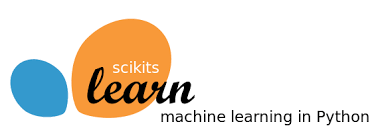


---
### **학습 목표**
> 5-1. 머신 러닝 개요 <br>
> 5-2. sklearn 이란? <br>
> 5-3. 전처리 기본 (정규화, 표준화, 범주형 데이터, 학습/테스트 세트 분할) <br>
> 5-4. 분류 분석 모델링 <br>
> 5-5. 분류 성능 평가하기 <br>
> **5-6. 회귀 분석 모델링** <br>
> 5-7. 회귀 성능 평가하기 <br>
> 5-8. 앙상블 모델링 <br>
> 5-9. 하이퍼파라미터(hyper-parameter) 튜닝 <br>
> 5-10. 비지도 군집화 분석

## 5-6. 회귀 분석 모델링
> - 이번 시간에는 '**수치형**' 데이터를 예측하기 위한 대표적인 **지도 학습(Supervised Learning)** 방법론인 **회귀 분석**에 대해 알아보겠습니다.

> ###  **5-6-1. 회귀 분석(Regression Analysis) 이란?**
> - 통계학의 꽃이라고도 불리는 회귀 분석은 **데이터로부터 변수들 간의 함수 관계를 찾아내는 방법**입니다.
> - **과거 수치형 데이터**로 부터 이 **함수관계를 찾아내고**, **미래 수치형 데이터**를 **예측**하는 문제에 주로 사용됩니다.
> - '**되돌아 가다**'는 의미인 '**회귀**' 라는 단어가 사용된 이유는, 처음 회귀 분석을 고안한 영국 과학자 갈톤(Galton) 의 "**자식의 키와 부모의 키 관계**" 연구에서 결국 "**부모의 키와 상관 없이 자식들은 보통 키로 회귀(돌아간다)**" 라고 사용한 것에서 유래했습니다.
> - 부동산 가격 예측, 고객 수요 예측, 원재료 가격 예측 등 많은 수치형 예측 문제에 활용될 수 있습니다.
> - **과거 데이터 패턴을 학습하는 방법**이기 때문에, **변동성이 심한 문제**에서는 **모델 성능이 떨어질 수 있습니다.**

> 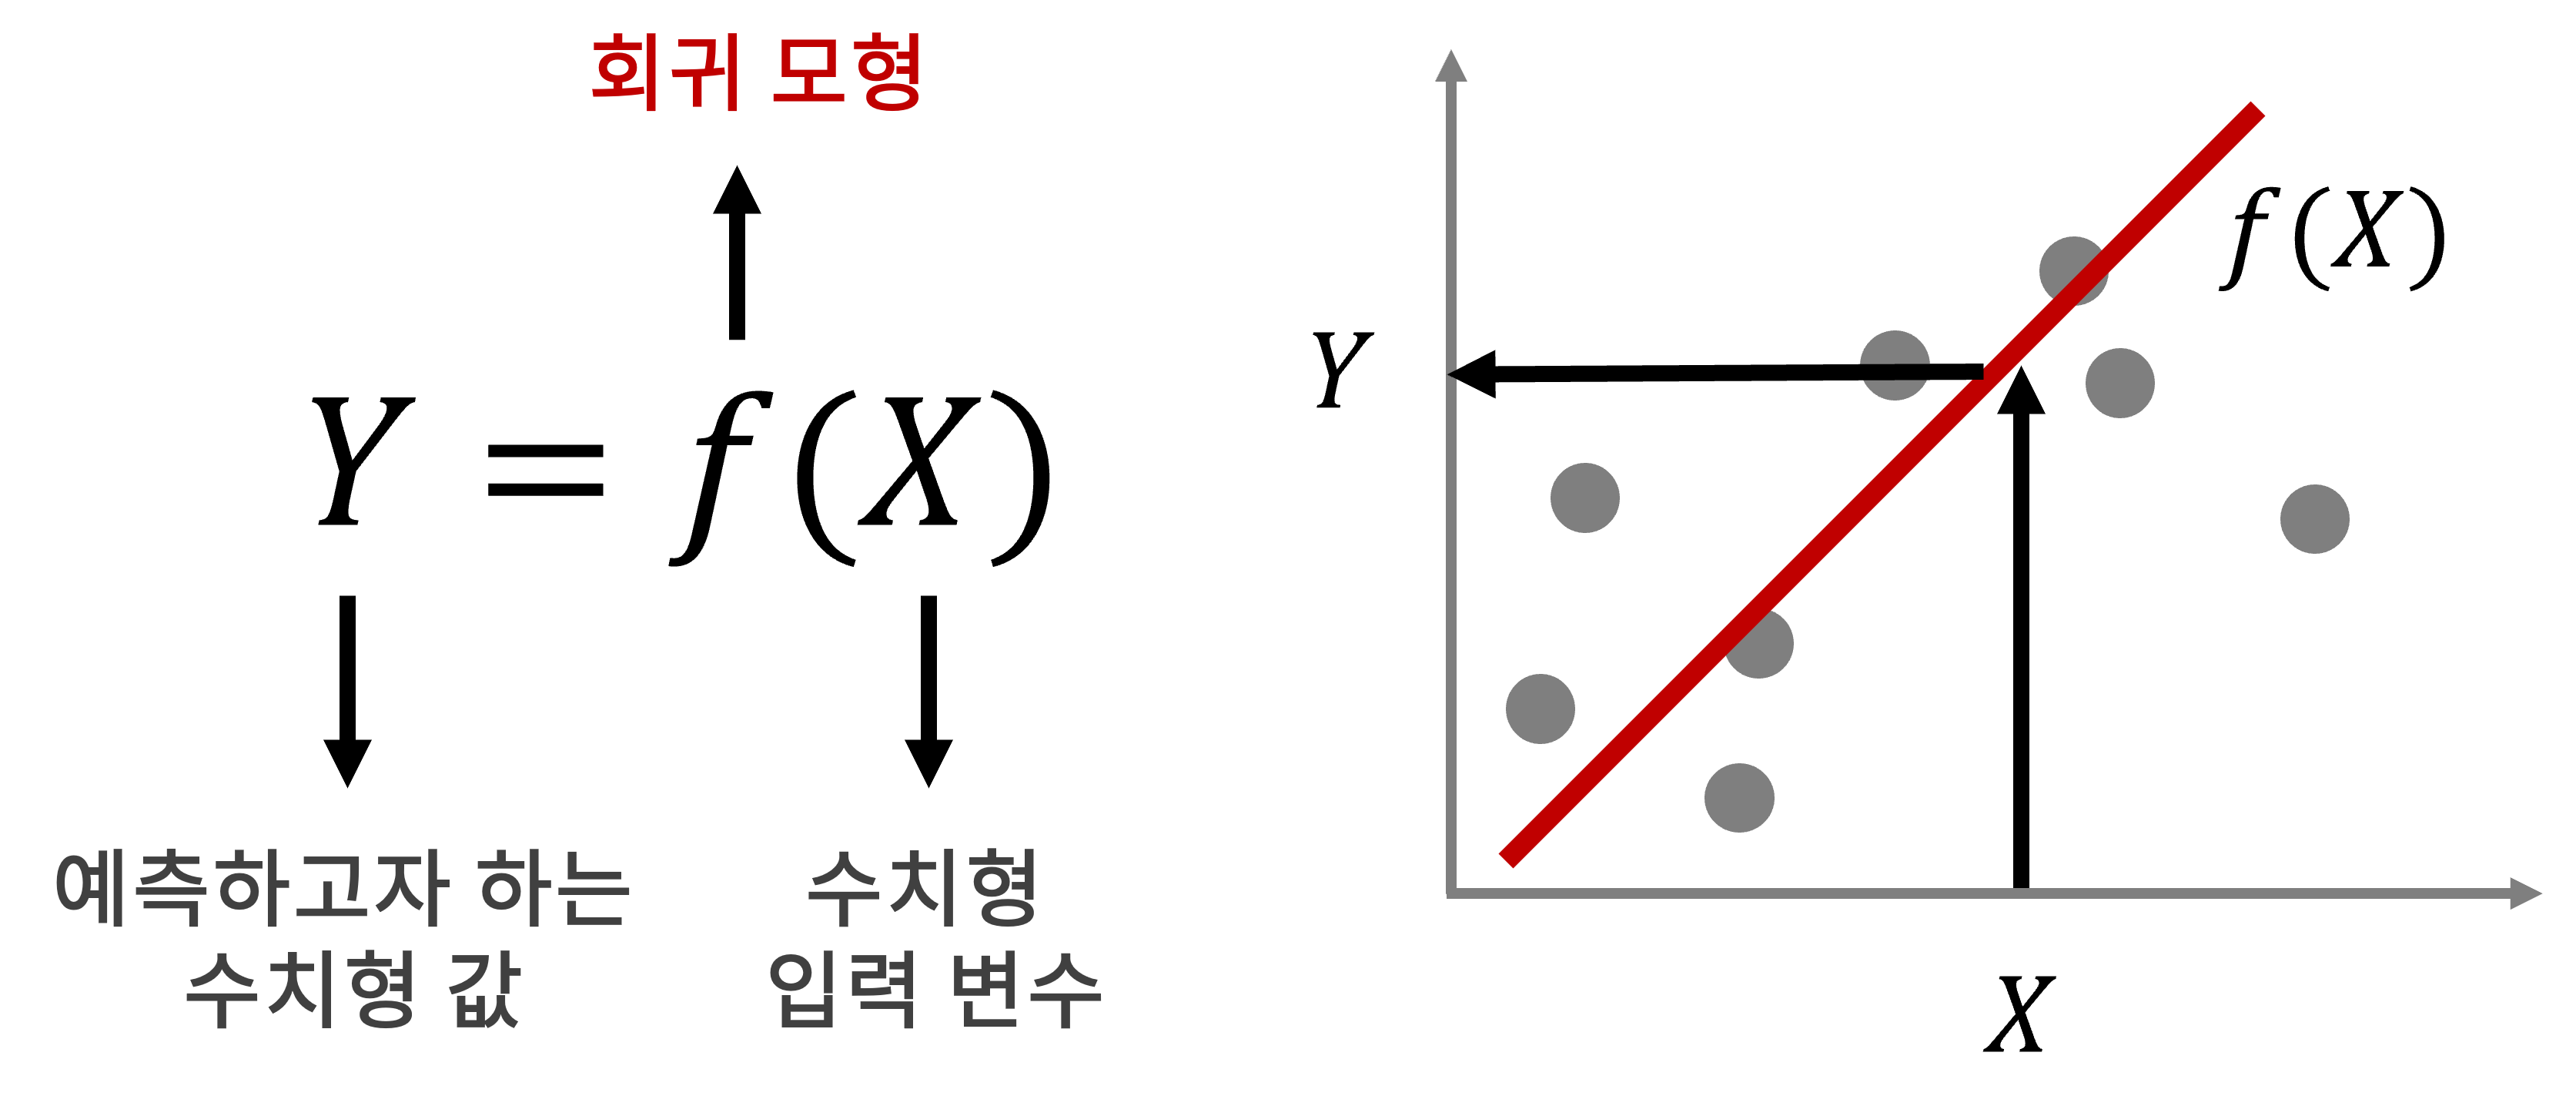

In [3]:
# 라이브러리 불러오기
import matplotlib.pylab as plt
import seaborn as sns
import numpy as np
import pandas as pd

> ###  **5-6-3. 선형 회귀 (Linear Regression)**
> - 선형 회귀란 **변수들 사이의 선형적인(직선적인) 함수 관계를 모델링** 하는 방법입니다.
> - 데이터를 바탕으로 **변수 관계를 설명하는 일차 방정식 함수**를 만들어 내게 됩니다.
    - **Y = WX + b** (W : 기울기, b : y 절편)
    - 학습 방법은 경사 하강법 알고리즘을 사용합니다. (02. sklearn - (1) 이란?)
> - 즉, **학습을 통해서 가장 합리적인 선을 찾아내는 것** 이라고도 생각 할 수 있습니다.
> - 만약 **변수들의 상관관계가 없다면** 합리적인 선을 **찾아내지 못할 수 있습니다.**

> 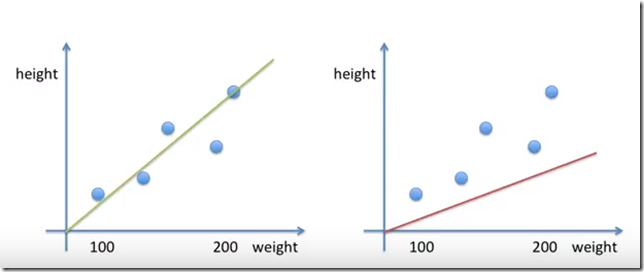

In [1]:
# 라이브러리 로딩
from sklearn.linear_model import LinearRegression

In [8]:
# 샘플 데이터 생성
df = pd.DataFrame({'height': [160, 180, 170, 150, 175, 165, 185, 155, 140, 190],
                   'weight': [48, 75, 73, 45, 75, 55, 78, 53, 40, 85]})

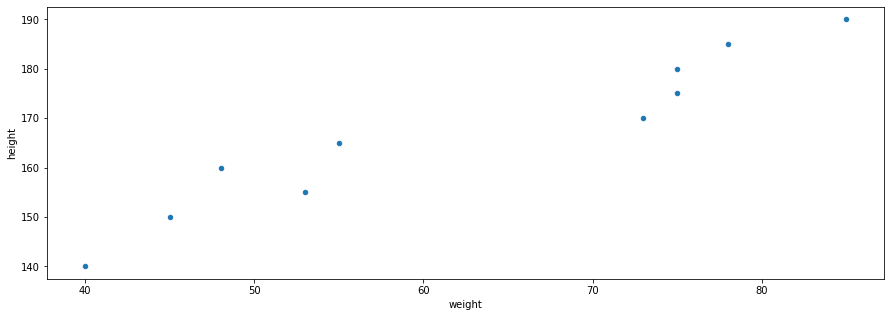

In [14]:
# 시각화
df.plot.scatter(x='weight', y='height', figsize=(15,5))

In [15]:
# 선형 회귀 모델 정의 / 학습
lr_model = LinearRegression()
lr_model.fit(df['weight'], df['height'])

ValueError: ignored

In [18]:
df['weight']

0    48
1    75
2    73
3    45
4    75
5    55
6    78
7    53
8    40
9    85
Name: weight, dtype: int64

In [19]:
df['weight'].values.reshape(-1, 1)

array([[48],
       [75],
       [73],
       [45],
       [75],
       [55],
       [78],
       [53],
       [40],
       [85]])

In [17]:
# 선형 회귀 모델 정의 / 학습
lr_model = LinearRegression()
lr_model.fit(df['weight'].values.reshape(-1, 1), df['height'])

LinearRegression()

In [20]:
# 기울기 (W)
lr_model.coef_

array([0.95205509])

In [21]:
# y 절편 (b)
lr_model.intercept_

107.30614601599589

In [38]:
# 선형 회귀 선 만들기
x = np.linspace(40, 90, 50)
y = lr_model.coef_[0]*x + lr_model.intercept_ # Y = W*X + b
y

array([145.38834951, 146.3598343 , 147.33131908, 148.30280386,
       149.27428865, 150.24577343, 151.21725821, 152.188743  ,
       153.16022778, 154.13171256, 155.10319735, 156.07468213,
       157.04616691, 158.0176517 , 158.98913648, 159.96062126,
       160.93210604, 161.90359083, 162.87507561, 163.84656039,
       164.81804518, 165.78952996, 166.76101474, 167.73249953,
       168.70398431, 169.67546909, 170.64695388, 171.61843866,
       172.58992344, 173.56140823, 174.53289301, 175.50437779,
       176.47586257, 177.44734736, 178.41883214, 179.39031692,
       180.36180171, 181.33328649, 182.30477127, 183.27625606,
       184.24774084, 185.21922562, 186.19071041, 187.16219519,
       188.13367997, 189.10516476, 190.07664954, 191.04813432,
       192.0196191 , 192.99110389])

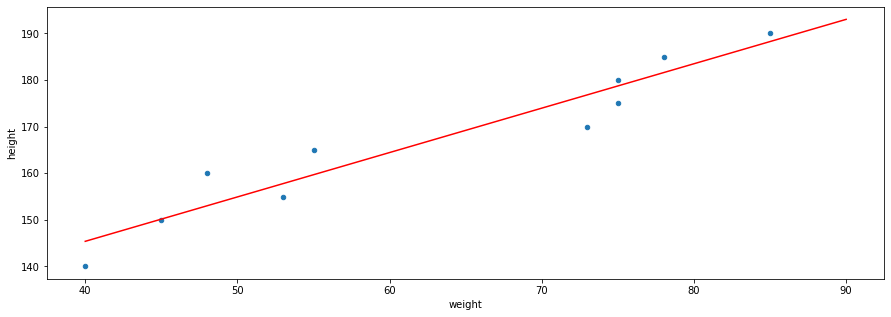

In [47]:
# 선형 회귀 선 시각화
df.plot.scatter(x='weight', y='height', figsize=(15,5))
plt.plot(x, y, c='red')
plt.show()

> ###  **5-6-4. 다중 선형 회귀 (Multi-Linear Regression)**
> - 다중 선형 회귀란 **변수 (X) 가 여러개인 회귀 분석**을 말합니다.
    - Y = W1X1 + W2X2 + W3X3 + ... + b
> - 대부분의 **실제 문제는 변수가 하나 이상**이기 때문에, 다중 선형 회귀가 많이 활용됩니다.
> - 일반적으로 선형 회귀 분석에서는 자동적으로 단위에 맞는 함수를 찾아주기 때문에 **정규화/표준화 과정이 필요 없습니다.**

> **실습 데이터 세트 (캘리포니아 주택 가격 정보)**
> - [scikit-learn 제공 데이터 세트 목록](https://scikit-learn.org/stable/modules/classes.html?highlight=datasets#module-sklearn.datasets)



In [70]:
from sklearn.datasets import fetch_california_housing
dataset = fetch_california_housing()
cal_house_df = pd.DataFrame(dataset.data, columns=dataset.feature_names)
cal_house_df['Price($)'] = dataset.target * 100000

In [71]:
cal_house_df

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,Price($)
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,452600.0
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,358500.0
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,352100.0
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,341300.0
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,342200.0
...,...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09,78100.0
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21,77100.0
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22,92300.0
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32,84700.0


> **학습/테스트 데이터 세트 분할**

In [88]:
from sklearn.model_selection import train_test_split    # 라이브러리 로딩

X = cal_house_df.drop('Price($)', axis=1)  # 예측에 사용할 변수 
Y = cal_house_df['Price($)']               # 예측할 변수

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.01, shuffle=True)

In [89]:
X_train

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
3321,1.6164,17.0,4.672297,1.172297,719.0,2.429054,38.98,-122.83
5217,0.6831,37.0,3.904832,0.982430,2865.0,4.194729,33.95,-118.23
14196,3.2596,33.0,5.017657,1.006421,2300.0,3.691814,32.71,-117.03
13455,4.8889,5.0,6.158763,0.942268,1821.0,3.754639,34.11,-117.39
15309,2.4583,35.0,3.741935,1.064516,538.0,2.169355,33.19,-117.38
...,...,...,...,...,...,...,...,...
3150,3.4911,6.0,7.593361,1.340249,1243.0,2.578838,35.08,-118.61
18587,2.8214,29.0,4.763527,0.953908,1669.0,3.344689,36.94,-121.80
14309,1.6953,35.0,3.743902,1.097561,691.0,4.213415,32.71,-117.13
16291,2.1991,47.0,4.712766,1.042553,517.0,2.750000,37.97,-121.24


In [90]:
Y_train

3321      77800.0
5217      87500.0
14196    103000.0
13455    138900.0
15309    197900.0
           ...   
3150     137200.0
18587    190100.0
14309     81300.0
16291     67200.0
9683     231800.0
Name: Price($), Length: 20433, dtype: float64

> **다중선형 회귀 모델 정의 / 학습**

In [91]:
mlr_model = LinearRegression()
mlr_model.fit(X_train, Y_train)

LinearRegression()

> **예측 결과 확인**

In [ ]:
predictions = mlr_model.predict(X_test)
predictions

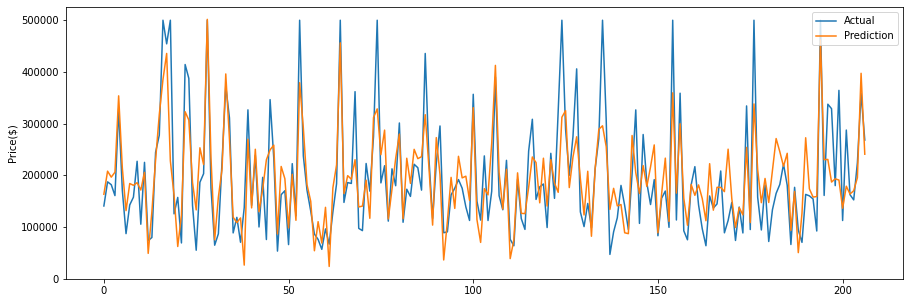

In [94]:
# 예측 결과 시각화
Y_test = Y_test.reset_index(drop=True)

plt.figure(figsize=(15, 5))
plt.plot(Y_test, label='Actual')
plt.plot(predictions, label='Prediction')
plt.legend(loc='upper right')
plt.ylabel('Price($)')
plt.show()